In [1]:
import sympy as sp
import numpy as np

In [2]:
H_Lo = sp.Symbol("H_0^\\text{Lo}")
q_Lo = sp.Symbol("q_0^\\text{Lo}")
j_Lo = sp.Symbol("j_0^\\text{Lo}")
c = sp.Symbol("c")
r = sp.Symbol("r")
z = sp.Symbol("z")
H = sp.Symbol("H_0^\\text{Pl}")
q = sp.Symbol("q_0^\\text{Pl}")
j = sp.Symbol("j_0^\\text{Pl}")
s = sp.Symbol("s_0^\\text{Pl}")
f0 = sp.Symbol("\Phi_0")
f1 = sp.Symbol("f_1")
f2 = sp.Symbol("f_2")
f3 = sp.Symbol("f_3")
f4 = sp.Symbol("f_4")
g2 = sp.Symbol("g_2")
g4 = sp.Symbol("g_4")
tau1 = sp.Symbol("tau_1")
tau2 = sp.Symbol("tau_2")
tau3 = sp.Symbol("tau_3")
tau4 = sp.Symbol("tau_4")
tau5 = sp.Symbol("tau_5")
epsilon = sp.Symbol("epsilon")
tau = sp.Symbol("tau")

In [3]:
a_tau =sp.series(1+H*epsilon*tau-sp.Rational(1,2)*q*(H*epsilon*tau)**2+sp.Rational(1,6)*j*(H*epsilon*tau)**3+sp.Rational(1,24)*s*(H*epsilon*tau)**4,epsilon,0,5)

a_tau

H_0^\text{Pl}**4*epsilon**4*s_0^\text{Pl}*tau**4/24 + H_0^\text{Pl}**3*epsilon**3*j_0^\text{Pl}*tau**3/6 - H_0^\text{Pl}**2*epsilon**2*q_0^\text{Pl}*tau**2/2 + H_0^\text{Pl}*epsilon*tau + 1

In [4]:
H_tau = sp.simplify(sp.series(sp.diff(a_tau,tau)/a_tau,epsilon,0,5))

H_tau

H_0^\text{Pl}*epsilon - H_0^\text{Pl}**2*epsilon**2*tau*(q_0^\text{Pl} + 1) + H_0^\text{Pl}**3*epsilon**3*tau**2*(j_0^\text{Pl} + 3*q_0^\text{Pl} + 2)/2 + H_0^\text{Pl}**4*epsilon**4*tau**3*(-4*j_0^\text{Pl} - 3*q_0^\text{Pl}*(q_0^\text{Pl} + 2) - 6*q_0^\text{Pl} + s_0^\text{Pl} - 6)/6 + O(epsilon**5)

In [5]:
F_tau = f0+f1*(tau*epsilon)+f2*(tau*epsilon)**2+f3*(tau*epsilon)**3+f4*(tau*epsilon)**4

eq = sp.series(F_tau*(3*H_tau**2+2*sp.diff(H_tau,tau))+4*H_tau*sp.diff(F_tau,tau)+sp.diff(F_tau,tau,2),epsilon,0,5)

eq = eq.removeO()

eq = sp.Poly(eq, epsilon)

c1,c2,c3=eq.coeffs()

F_tau = F_tau.subs(epsilon,1)

sols = sp.solve([c1,c2,c3],f2,f3,f4)

f2sol = sols[f2]
f3sol = sols[f3]
f4sol = sols[f4]

In [6]:
f2sol

H_0^\text{Pl}**2*\Phi_0*q_0^\text{Pl} - H_0^\text{Pl}**2*\Phi_0/2 - 2*H_0^\text{Pl}*f_1

In [7]:
f3sol

-H_0^\text{Pl}**3*\Phi_0*j_0^\text{Pl}/3 - 4*H_0^\text{Pl}**3*\Phi_0*q_0^\text{Pl}/3 + H_0^\text{Pl}**3*\Phi_0 + H_0^\text{Pl}**2*f_1*q_0^\text{Pl} + 19*H_0^\text{Pl}**2*f_1/6

In [8]:
f4sol

5*H_0^\text{Pl}**4*\Phi_0*j_0^\text{Pl}/12 + 5*H_0^\text{Pl}**4*\Phi_0*q_0^\text{Pl}**2/6 + 5*H_0^\text{Pl}**4*\Phi_0*q_0^\text{Pl}/4 - H_0^\text{Pl}**4*\Phi_0*s_0^\text{Pl}/12 - 37*H_0^\text{Pl}**4*\Phi_0/24 - H_0^\text{Pl}**3*f_1*j_0^\text{Pl}/3 - 19*H_0^\text{Pl}**3*f_1*q_0^\text{Pl}/6 - 9*H_0^\text{Pl}**3*f_1/2

In [9]:
tau_r = tau1*r/c+tau2*(r/c)**2+tau3*(r/c)**3+tau4*(r/c)**4+tau5*(r/c)**5

In [10]:
a_r = sp.series(a_tau.subs(tau,tau_r).subs(epsilon,1),r,0,6)

a_r = a_r.removeO()

In [11]:
a_r

H_0^\text{Pl}*r*tau_1/c + r**5*(H_0^\text{Pl}**4*s_0^\text{Pl}*tau_1**3*tau_2/(6*c**5) + H_0^\text{Pl}**3*j_0^\text{Pl}*tau_1**3*(3*tau_3/(c**2*tau_1) + 3*tau_2**2/(c**2*tau_1**2))/(6*c**3) - H_0^\text{Pl}**2*q_0^\text{Pl}*tau_1**2*(2*tau_4/(c**3*tau_1) + 2*tau_2*tau_3/(c**3*tau_1**2))/(2*c**2) + H_0^\text{Pl}*tau_5/c**5) + r**4*(H_0^\text{Pl}**4*s_0^\text{Pl}*tau_1**4/(24*c**4) + H_0^\text{Pl}**3*j_0^\text{Pl}*tau_1**2*tau_2/(2*c**4) - H_0^\text{Pl}**2*q_0^\text{Pl}*tau_1**2*(2*tau_3/(c**2*tau_1) + tau_2**2/(c**2*tau_1**2))/(2*c**2) + H_0^\text{Pl}*tau_4/c**4) + r**3*(H_0^\text{Pl}**3*j_0^\text{Pl}*tau_1**3/(6*c**3) - H_0^\text{Pl}**2*q_0^\text{Pl}*tau_1*tau_2/c**3 + H_0^\text{Pl}*tau_3/c**3) + r**2*(-H_0^\text{Pl}**2*q_0^\text{Pl}*tau_1**2/(2*c**2) + H_0^\text{Pl}*tau_2/c**2) + 1

In [12]:
G_r = 1+g2*r**2+g4*r**4
F_r = sp.series(F_tau.subs(tau,tau_r),r,0,6).removeO()
F_r

\Phi_0 + r**5*(f_2*tau_1**2*(2*tau_4/(c**3*tau_1) + 2*tau_2*tau_3/(c**3*tau_1**2))/c**2 + f_3*tau_1**3*(3*tau_3/(c**2*tau_1) + 3*tau_2**2/(c**2*tau_1**2))/c**3 + f_1*tau_5/c**5 + 4*f_4*tau_1**3*tau_2/c**5) + r**4*(f_2*tau_1**2*(2*tau_3/(c**2*tau_1) + tau_2**2/(c**2*tau_1**2))/c**2 + f_1*tau_4/c**4 + 3*f_3*tau_1**2*tau_2/c**4 + f_4*tau_1**4/c**4) + r**3*(f_1*tau_3/c**3 + 2*f_2*tau_1*tau_2/c**3 + f_3*tau_1**3/c**3) + r**2*(f_1*tau_2/c**2 + f_2*tau_1**2/c**2) + f_1*r*tau_1/c

In [13]:
G_r

g_2*r**2 + g_4*r**4 + 1

In [14]:
eq = sp.series(sp.diff(tau_r,r)-(-1+2*G_r*F_r)*a_r/c,r,0,5)

eq = eq.removeO()

eq = sp.Poly(eq, r)

c1,c2,c3,c4,c5= eq.coeffs()

sols = sp.solve([c1,c2,c3,c4,c5],tau1,tau2,tau3,tau4,tau5)

soltau1,soltau2,soltau3,soltau4,soltau5 = sols[0]

In [15]:
listaf = [(f2,f2sol),(f3,f3sol),(f4,f4sol)]
lista = [(f0,epsilon*f0),(f1,epsilon*f1)]

tau1linear = sp.series(soltau1.subs(listaf).subs(lista),epsilon,0,2).removeO().subs(epsilon,1)
tau2linear = sp.series(soltau2.subs(listaf).subs(lista),epsilon,0,2).removeO().subs(epsilon,1)
tau3linear = sp.series(soltau3.subs(listaf).subs(lista),epsilon,0,2).removeO().subs(epsilon,1)
tau4linear = sp.series(soltau4.subs(listaf).subs(lista),epsilon,0,2).removeO().subs(epsilon,1)
tau5linear = sp.series(soltau5.subs(listaf).subs(lista),epsilon,0,2).removeO().subs(epsilon,1)

In [16]:
tau1linear

2*\Phi_0 - 1

In [17]:
tau2linear

-2*H_0^\text{Pl}*\Phi_0 + H_0^\text{Pl}/2 - f_1

In [18]:
tau3linear

-H_0^\text{Pl}**2*\Phi_0*q_0^\text{Pl}/3 + 2*H_0^\text{Pl}**2*\Phi_0/3 + H_0^\text{Pl}**2*q_0^\text{Pl}/6 - H_0^\text{Pl}**2/6 + 2*\Phi_0*c**2*g_2/3

In [19]:
tau4linear

-H_0^\text{Pl}**3*\Phi_0*j_0^\text{Pl}/6 + 5*H_0^\text{Pl}**3*\Phi_0*q_0^\text{Pl}/6 - H_0^\text{Pl}**3*\Phi_0/4 + H_0^\text{Pl}**3*j_0^\text{Pl}/24 - H_0^\text{Pl}**3*q_0^\text{Pl}/6 + H_0^\text{Pl}**3/24 + H_0^\text{Pl}**2*f_1*q_0^\text{Pl}/12 - H_0^\text{Pl}**2*f_1/6 - 2*H_0^\text{Pl}*\Phi_0*c**2*g_2/3 - c**2*f_1*g_2/2

In [20]:
tau5linear

23*H_0^\text{Pl}**4*\Phi_0*j_0^\text{Pl}/60 + H_0^\text{Pl}**4*\Phi_0*q_0^\text{Pl}**2/5 - 7*H_0^\text{Pl}**4*\Phi_0*q_0^\text{Pl}/12 + H_0^\text{Pl}**4*\Phi_0*s_0^\text{Pl}/20 + H_0^\text{Pl}**4*\Phi_0/30 - 7*H_0^\text{Pl}**4*j_0^\text{Pl}/120 - H_0^\text{Pl}**4*q_0^\text{Pl}**2/30 + 11*H_0^\text{Pl}**4*q_0^\text{Pl}/120 - H_0^\text{Pl}**4*s_0^\text{Pl}/120 - H_0^\text{Pl}**4/120 + H_0^\text{Pl}**3*f_1*j_0^\text{Pl}/20 - 13*H_0^\text{Pl}**3*f_1*q_0^\text{Pl}/60 - H_0^\text{Pl}**3*f_1/60 + H_0^\text{Pl}**2*\Phi_0*c**2*g_2*q_0^\text{Pl}/15 + 2*H_0^\text{Pl}**2*\Phi_0*c**2*g_2/15 - H_0^\text{Pl}*c**2*f_1*g_2/10 + 2*\Phi_0*c**4*g_4/5

In [21]:
listatau = [(tau1,tau1linear),(tau2,tau2linear),(tau3,tau3linear),(tau4,tau4linear),(tau5,tau5linear)]

a_r = a_r.subs(listatau).subs(lista)
a_r = sp.series(a_r,epsilon,0,2).removeO().subs(epsilon,1)
a_r = sp.series(a_r,r,0,4).removeO()

a_r

r**3*(H_0^\text{Pl}**3*\Phi_0*j_0^\text{Pl}/c**3 - 10*H_0^\text{Pl}**3*\Phi_0*q_0^\text{Pl}/(3*c**3) + 2*H_0^\text{Pl}**3*\Phi_0/(3*c**3) - H_0^\text{Pl}**3*j_0^\text{Pl}/(6*c**3) + 2*H_0^\text{Pl}**3*q_0^\text{Pl}/(3*c**3) - H_0^\text{Pl}**3/(6*c**3) - H_0^\text{Pl}**2*f_1*q_0^\text{Pl}/c**3 + 2*H_0^\text{Pl}*\Phi_0*g_2/(3*c)) + r**2*(2*H_0^\text{Pl}**2*\Phi_0*q_0^\text{Pl}/c**2 - 2*H_0^\text{Pl}**2*\Phi_0/c**2 - H_0^\text{Pl}**2*q_0^\text{Pl}/(2*c**2) + H_0^\text{Pl}**2/(2*c**2) - H_0^\text{Pl}*f_1/c**2) + r*(2*H_0^\text{Pl}*\Phi_0/c - H_0^\text{Pl}/c) + 1

In [22]:
F_r = F_r.subs(listaf).subs(listatau).subs(lista)
F_r = sp.series(F_r,epsilon,0,2).removeO().subs(epsilon,1)

F_r = sp.series(F_r,r,0,4).removeO()

F_r

\Phi_0 + r**3*(H_0^\text{Pl}**3*\Phi_0*j_0^\text{Pl}/(3*c**3) + H_0^\text{Pl}**3*\Phi_0*q_0^\text{Pl}/(3*c**3) - H_0^\text{Pl}**3*\Phi_0/(2*c**3) - 5*H_0^\text{Pl}**2*f_1*q_0^\text{Pl}/(6*c**3) - 4*H_0^\text{Pl}**2*f_1/(3*c**3)) + r**2*(H_0^\text{Pl}**2*\Phi_0*q_0^\text{Pl}/c**2 - H_0^\text{Pl}**2*\Phi_0/(2*c**2) - 3*H_0^\text{Pl}*f_1/(2*c**2)) - f_1*r/c

In [23]:
Phi_r = sp.series(G_r*F_r,r,0,4).removeO()

Phi_r

\Phi_0 + r**3*(H_0^\text{Pl}**3*\Phi_0*j_0^\text{Pl}/(3*c**3) + H_0^\text{Pl}**3*\Phi_0*q_0^\text{Pl}/(3*c**3) - H_0^\text{Pl}**3*\Phi_0/(2*c**3) - 5*H_0^\text{Pl}**2*f_1*q_0^\text{Pl}/(6*c**3) - 4*H_0^\text{Pl}**2*f_1/(3*c**3) - f_1*g_2/c) + r**2*(H_0^\text{Pl}**2*\Phi_0*q_0^\text{Pl}/c**2 - H_0^\text{Pl}**2*\Phi_0/(2*c**2) - 3*H_0^\text{Pl}*f_1/(2*c**2) + \Phi_0*g_2) - f_1*r/c

In [24]:
z_r = ( 1+Phi_r-Phi_r.subs(r,0) )/a_r-1

In [25]:
z_r = sp.series(z_r,r,0,4).removeO()

z_r = sp.series(z_r.subs(lista),epsilon,0,2).removeO().subs(epsilon,1)

z_r = sp.series(z_r,r,0,4)

In [26]:
z_r

r**3*(-2*H_0^\text{Pl}**3*\Phi_0*j_0^\text{Pl}/(3*c**3) - 4*H_0^\text{Pl}**3*\Phi_0*q_0^\text{Pl}/(3*c**3) - 5*H_0^\text{Pl}**3*\Phi_0/(3*c**3) + H_0^\text{Pl}**3*j_0^\text{Pl}/(6*c**3) + H_0^\text{Pl}**3*q_0^\text{Pl}/(3*c**3) + H_0^\text{Pl}**3/(6*c**3) - H_0^\text{Pl}**2*f_1*q_0^\text{Pl}/(3*c**3) - 4*H_0^\text{Pl}**2*f_1/(3*c**3) + H_0^\text{Pl}*\Phi_0*g_2/(3*c) - f_1*g_2/c) + r**2*(-H_0^\text{Pl}**2*\Phi_0*q_0^\text{Pl}/c**2 - 5*H_0^\text{Pl}**2*\Phi_0/(2*c**2) + H_0^\text{Pl}**2*q_0^\text{Pl}/(2*c**2) + H_0^\text{Pl}**2/(2*c**2) - 3*H_0^\text{Pl}*f_1/(2*c**2) + \Phi_0*g_2) + r*(-2*H_0^\text{Pl}*\Phi_0/c + H_0^\text{Pl}/c - f_1/c)

In [27]:
def invert(s,y,x):
    
    '''
    s: sympy expression
    y: variable of s
    x: output variable

    NOTE: the series has to be centered around 0.
    '''

    s = sp.Poly(s, y)
    a3,a2,a1 = s.coeffs()
    
    A1 = 1/a1
    A2 = -a2/a1**3
    A3 = (2*a2**2-a1*a3)/a1**5
    
    A1 = sp.series(A1.subs(lista),epsilon,0,2).removeO().subs(epsilon,1).simplify()
    A2 = sp.series(A2.subs(lista),epsilon,0,2).removeO().subs(epsilon,1).simplify()
    A3 = sp.series(A3.subs(lista),epsilon,0,2).removeO().subs(epsilon,1).simplify()
    
    return sp.series(A1*x+A2*x**2+A3*x**3,x,0,4)

In [28]:
r_z = invert(z_r,r,z)

In [29]:
r_z

z**3*(-2*\Phi_0*c*j_0^\text{Pl}/(3*H_0^\text{Pl}) + 3*\Phi_0*c*q_0^\text{Pl}**2/H_0^\text{Pl} + 5*\Phi_0*c*q_0^\text{Pl}/(3*H_0^\text{Pl}) + \Phi_0*c/(3*H_0^\text{Pl}) - c*j_0^\text{Pl}/(6*H_0^\text{Pl}) + c*q_0^\text{Pl}**2/(2*H_0^\text{Pl}) + 2*c*q_0^\text{Pl}/(3*H_0^\text{Pl}) + c/(3*H_0^\text{Pl}) - 2*c*f_1*j_0^\text{Pl}/(3*H_0^\text{Pl}**2) + 5*c*f_1*q_0^\text{Pl}**2/(2*H_0^\text{Pl}**2) + c*f_1*q_0^\text{Pl}/H_0^\text{Pl}**2 + c*f_1/(6*H_0^\text{Pl}**2) + 2*\Phi_0*c**3*g_2*q_0^\text{Pl}/H_0^\text{Pl}**3 + 5*\Phi_0*c**3*g_2/(3*H_0^\text{Pl}**3) + c**3*f_1*g_2/H_0^\text{Pl}**4) + z**2*(-2*\Phi_0*c*q_0^\text{Pl}/H_0^\text{Pl} - \Phi_0*c/(2*H_0^\text{Pl}) - c*q_0^\text{Pl}/(2*H_0^\text{Pl}) - c/(2*H_0^\text{Pl}) - 3*c*f_1*q_0^\text{Pl}/(2*H_0^\text{Pl}**2) - \Phi_0*c**3*g_2/H_0^\text{Pl}**3) + z*(2*\Phi_0*c/H_0^\text{Pl} + c/H_0^\text{Pl} + c*f_1/H_0^\text{Pl}**2)

In [30]:
val = sp.series(sp.integrate(1-f0*G_r,(r,0,r)),r,0,4).removeO()

val = sp.series(val.subs(r,r_z),z,0,4)

In [31]:
d_L = sp.expand((1+z)*val).removeO()

d_L = sp.series(d_L.subs(lista),epsilon,0,2).removeO().subs(epsilon,1)

In [32]:
d_L = sp.series(d_L,z,0,4)

In [33]:
d_L

z**3*(-\Phi_0*c*j_0^\text{Pl}/(2*H_0^\text{Pl}) + 5*\Phi_0*c*q_0^\text{Pl}**2/(2*H_0^\text{Pl}) - \Phi_0*c*q_0^\text{Pl}/(2*H_0^\text{Pl}) - c*j_0^\text{Pl}/(6*H_0^\text{Pl}) + c*q_0^\text{Pl}**2/(2*H_0^\text{Pl}) + c*q_0^\text{Pl}/(6*H_0^\text{Pl}) - c/(6*H_0^\text{Pl}) - 2*c*f_1*j_0^\text{Pl}/(3*H_0^\text{Pl}**2) + 5*c*f_1*q_0^\text{Pl}**2/(2*H_0^\text{Pl}**2) - c*f_1*q_0^\text{Pl}/(2*H_0^\text{Pl}**2) + c*f_1/(6*H_0^\text{Pl}**2) + 2*\Phi_0*c**3*g_2*q_0^\text{Pl}/H_0^\text{Pl}**3 + \Phi_0*c**3*g_2/(3*H_0^\text{Pl}**3) + c**3*f_1*g_2/H_0^\text{Pl}**4) + z**2*(-3*\Phi_0*c*q_0^\text{Pl}/(2*H_0^\text{Pl}) + \Phi_0*c/H_0^\text{Pl} - c*q_0^\text{Pl}/(2*H_0^\text{Pl}) + c/(2*H_0^\text{Pl}) - 3*c*f_1*q_0^\text{Pl}/(2*H_0^\text{Pl}**2) + c*f_1/H_0^\text{Pl}**2 - \Phi_0*c**3*g_2/H_0^\text{Pl}**3) + z*(\Phi_0*c/H_0^\text{Pl} + c/H_0^\text{Pl} + c*f_1/H_0^\text{Pl}**2)

## Local modified coefficients 

In [34]:
eq = d_L
eq = sp.Poly(eq, z)
D3_Lo,D2_Lo,D1_Lo = eq.coeffs()

In [35]:
D1_Lo

(H_0^\text{Pl}*\Phi_0*c + H_0^\text{Pl}*c + c*f_1)/H_0^\text{Pl}**2

In [36]:
D2_Lo.expand()

-3*\Phi_0*c*q_0^\text{Pl}/(2*H_0^\text{Pl}) + \Phi_0*c/H_0^\text{Pl} - c*q_0^\text{Pl}/(2*H_0^\text{Pl}) + c/(2*H_0^\text{Pl}) - 3*c*f_1*q_0^\text{Pl}/(2*H_0^\text{Pl}**2) + c*f_1/H_0^\text{Pl}**2 - \Phi_0*c**3*g_2/H_0^\text{Pl}**3

In [37]:
D3_Lo.subs(j,1)

(15*H_0^\text{Pl}**3*\Phi_0*c*q_0^\text{Pl}**2 - 3*H_0^\text{Pl}**3*\Phi_0*c*q_0^\text{Pl} - 3*H_0^\text{Pl}**3*\Phi_0*c + 3*H_0^\text{Pl}**3*c*q_0^\text{Pl}**2 + H_0^\text{Pl}**3*c*q_0^\text{Pl} - 2*H_0^\text{Pl}**3*c + 15*H_0^\text{Pl}**2*c*f_1*q_0^\text{Pl}**2 - 3*H_0^\text{Pl}**2*c*f_1*q_0^\text{Pl} - 3*H_0^\text{Pl}**2*c*f_1 + 12*H_0^\text{Pl}*\Phi_0*c**3*g_2*q_0^\text{Pl} + 2*H_0^\text{Pl}*\Phi_0*c**3*g_2 + 6*c**3*f_1*g_2)/(6*H_0^\text{Pl}**4)

## Local standard coefficients

In [38]:
D1_Std = c/H_Lo
D2_Std = c*(1-q_Lo)/(2*H_Lo)
D3_Std = -c/(6*H_Lo)*(1-q_Lo-3*q_Lo**2+j_Lo)

In [39]:
D1_Std

c/H_0^\text{Lo}

In [40]:
D2_Std

c*(1 - q_0^\text{Lo})/(2*H_0^\text{Lo})

In [41]:
D3_Std

-c*(j_0^\text{Lo} - 3*q_0^\text{Lo}**2 - q_0^\text{Lo} + 1)/(6*H_0^\text{Lo})

## PLOTS

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'grey'
plt.rcParams['text.usetex'] = True

SIZE = 200

In [43]:
sols = sp.solve([D1_Std-D1_Lo.subs(j,1),D2_Std-D2_Lo.subs(j,1),D3_Std-D3_Lo.subs(j,1)],f0,f1,g2)

In [44]:
f0sol = sols[0][0]
f1sol = sols[0][1]
g2sol = sols[0][2]

In [45]:
f0sol

-3*(H_0^\text{Lo} - H_0^\text{Pl})*(2*H_0^\text{Lo}*q_0^\text{Pl} - H_0^\text{Lo} + H_0^\text{Pl}*q_0^\text{Lo} - 3*H_0^\text{Pl}*q_0^\text{Pl} + H_0^\text{Pl})/(H_0^\text{Lo}*(6*H_0^\text{Lo}*q_0^\text{Pl} - 3*H_0^\text{Lo} - H_0^\text{Pl}*j_0^\text{Lo} + 3*H_0^\text{Pl}*q_0^\text{Lo}**2 - 6*H_0^\text{Pl}*q_0^\text{Lo}*q_0^\text{Pl} + 3*H_0^\text{Pl}*q_0^\text{Lo} + 3*H_0^\text{Pl}*q_0^\text{Pl}**2 - 9*H_0^\text{Pl}*q_0^\text{Pl} + 4*H_0^\text{Pl}))

In [46]:
f1sol

H_0^\text{Pl}**2*(H_0^\text{Lo} - H_0^\text{Pl})*(j_0^\text{Lo} - 3*q_0^\text{Lo}**2 + 6*q_0^\text{Lo}*q_0^\text{Pl} - 3*q_0^\text{Pl}**2 - 1)/(H_0^\text{Lo}*(6*H_0^\text{Lo}*q_0^\text{Pl} - 3*H_0^\text{Lo} - H_0^\text{Pl}*j_0^\text{Lo} + 3*H_0^\text{Pl}*q_0^\text{Lo}**2 - 6*H_0^\text{Pl}*q_0^\text{Lo}*q_0^\text{Pl} + 3*H_0^\text{Pl}*q_0^\text{Lo} + 3*H_0^\text{Pl}*q_0^\text{Pl}**2 - 9*H_0^\text{Pl}*q_0^\text{Pl} + 4*H_0^\text{Pl}))

In [47]:
g2sol

-H_0^\text{Pl}**2*(6*H_0^\text{Lo}*q_0^\text{Pl} - 3*H_0^\text{Lo} - H_0^\text{Pl}*j_0^\text{Lo} + 3*H_0^\text{Pl}*q_0^\text{Lo}**2 - 6*H_0^\text{Pl}*q_0^\text{Lo}*q_0^\text{Pl} + 3*H_0^\text{Pl}*q_0^\text{Lo} + 3*H_0^\text{Pl}*q_0^\text{Pl}**2 - 9*H_0^\text{Pl}*q_0^\text{Pl} + 4*H_0^\text{Pl})/(6*c**2*(H_0^\text{Lo} - H_0^\text{Pl}))

In [48]:
# these depends on H, H_Lo, q, j

f0num = sp.lambdify([H,H_Lo,q,q_Lo,j,j_Lo],f0sol)
f1num = sp.lambdify([H,H_Lo,q,q_Lo,j,j_Lo],f1sol)
g2num = sp.lambdify([H,H_Lo,q,q_Lo,j,j_Lo,c],g2sol)

In [49]:
# these depends on q, j

kmtompc = 3.24078*10**(-20)
cval = 9.7*10**(-15)

H_planck = 67.4*kmtompc
H_riess = 74.22*kmtompc
q_planck = -0.5275
j_planck = 1

def f0numqj(q,j):
    return f0num(H_planck,H_riess,q_planck,q,j_planck,j)

def f1numqj(q,j):
    return f1num(H_planck,H_riess,q_planck,q,j_planck,j)

def g2numqj(q,j):
    return g2num(H_planck,H_riess,q_planck,q,j_planck,j,cval)

In [50]:
f0numqj(-0.33,1)

0.03357867034121205

In [51]:
def OmegaMperturbqj(q,j):
    return 4*g2numqj(q,j)*f0numqj(q,j)*(cval)**2/(H_planck)**2-2*(f0numqj(q,j)-f1numqj(q,j)/H_planck)

In [52]:
def coefsqj(q,j):
    
    return f0numqj(q,j),OmegaMperturbqj(q,j),g2numqj(q,j)
    
coefsqj = np.vectorize(coefsqj)

In [53]:
qarray = np.linspace(-1.2,0.3,SIZE)
jarray = np.linspace(-2.0,8.0,SIZE)
X, Y = np.meshgrid(qarray, jarray)

Zf0,ZOmega,Zg2 = coefsqj(X, Y)

Zf0 = np.array(Zf0).astype(np.float64)
ZOmega = np.array(ZOmega).astype(np.float64)
Zg2 = np.array(Zg2).astype(np.float64)

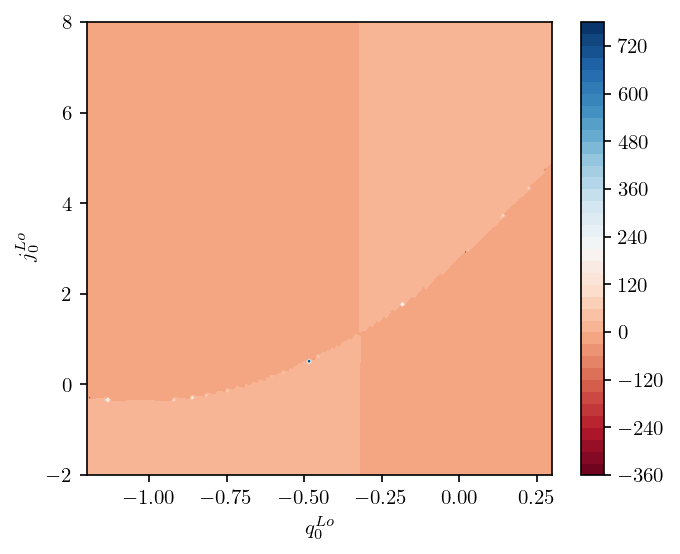

In [54]:
plt.figure(figsize=(5, 4))
plt.gcf().set_dpi(150)
plt.contourf(X, Y, Zf0,40,cmap='RdBu')
plt.colorbar()
plt.xlabel(r'$q_0^{Lo}$')
plt.ylabel(r'$j_0^{Lo}$')

plt.savefig("Phi0.pdf")
plt.show()

plt.close()

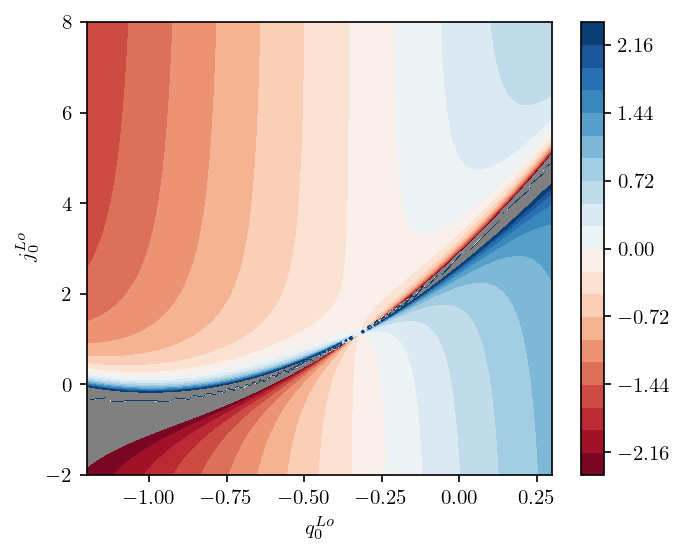

In [55]:
plt.figure(figsize=(5, 4))
plt.gcf().set_dpi(150)
plt.contourf(X, Y, ZOmega,cmap='RdBu',levels=np.linspace(-2.4,2.4,21))
plt.colorbar()
plt.xlabel(r'$q_0^{Lo}$')
plt.ylabel(r'$j_0^{Lo}$')

plt.savefig("Perturbed_Omega.pdf")

plt.show()
plt.close()

## PLOTS WITH PHYSICAL CONSTRAINTS: -45% to -15% for $\frac{\Omega^{(1)}}{\Omega^{(0)}}$ and $\Phi_0 > 0.1$ ,ONLY WITH VOIDS. (POSITIVE SOLUTIONS)

In [56]:
# mask for -45% to -15%

temporal = np.logical_or(ZOmega <= -0.45, ZOmega >= -0.15)

temporal2 = np.logical_or(temporal, Zg2 >=0 )

mascara = np.logical_or(temporal2, Zf0 > 0.10)

In [57]:
Zf0Masked = np.ma.array(Zf0, mask = mascara)
ZOmegaMasked = np.ma.array(ZOmega, mask = mascara)
Zg2Masked = np.ma.array(Zg2, mask = mascara)

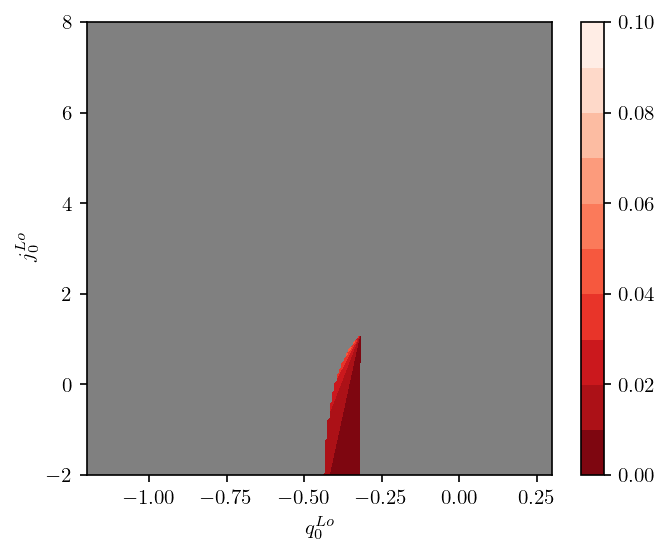

In [58]:
plt.figure(figsize=(5, 4))
plt.gcf().set_dpi(150)
plt.xlabel(r'$q_0^{Lo}$')
plt.ylabel(r'$j_0^{Lo}$')
plt.contourf(X, Y, Zf0Masked,40,cmap='Reds_r',levels=np.linspace(0,0.10,11))
plt.colorbar()

plt.savefig("constrained_Phi0.pdf")
plt.show()

plt.close()

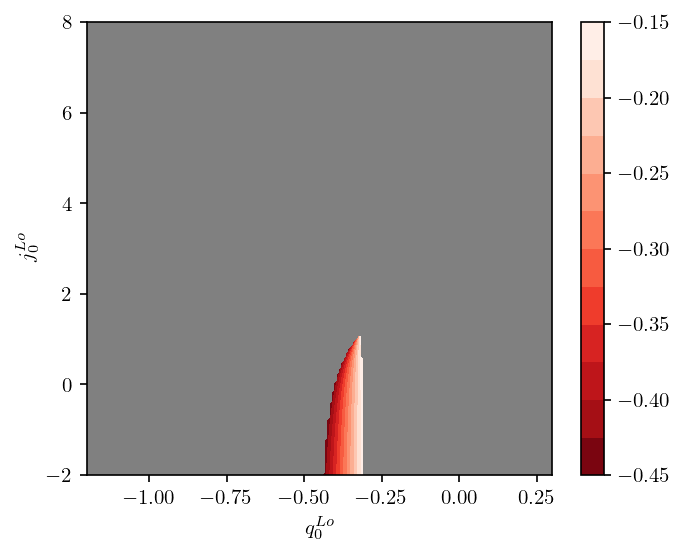

In [59]:
plt.figure(figsize=(5, 4))
plt.gcf().set_dpi(150)
plt.xlabel(r'$q_0^{Lo}$')
plt.ylabel(r'$j_0^{Lo}$')

plt.contourf(X, Y, ZOmegaMasked,cmap='Reds_r',levels=np.linspace(-0.45,-0.15,13))
plt.colorbar()

plt.savefig("constrained_Perturbed_Omega.pdf")
plt.show()

plt.close()

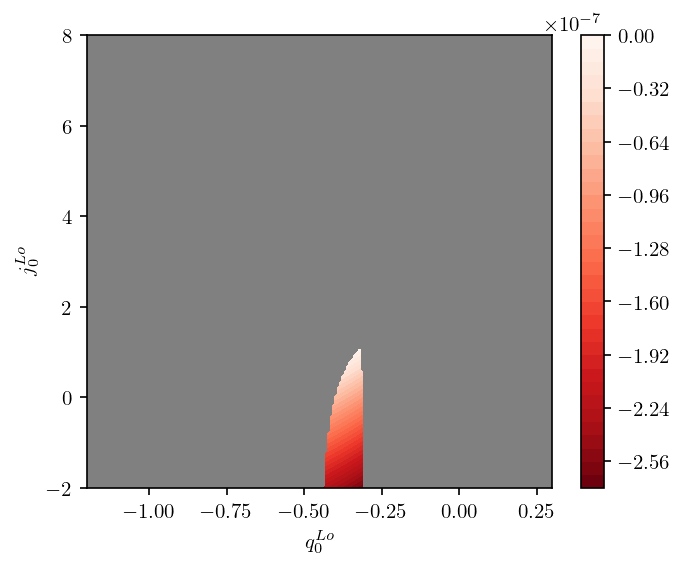

In [60]:
plt.figure(figsize=(5, 4))
plt.gcf().set_dpi(150)
plt.xlabel(r'$q_0^{Lo}$')
plt.ylabel(r'$j_0^{Lo}$')
plt.contourf(X, Y, Zg2Masked,40,cmap='Reds_r')
plt.colorbar()

plt.savefig("constrained_g2_pos.pdf")
plt.show()

plt.close()

## PLOTS WITH ZOOM IN

In [61]:
SIZE = 300

qarray = np.linspace(-0.5,-0.30,SIZE)
jarray = np.linspace(-3.0,2.0,SIZE)
X, Y = np.meshgrid(qarray, jarray)

# los f0 neg
Zf0,ZOmega,Zg2 = coefsqj(X, Y)

# convertir a numpy arrays
Zf0 = np.array(Zf0).astype(np.float64)
ZOmega = np.array(ZOmega).astype(np.float64)
Zg2 = np.array(Zg2).astype(np.float64)

In [62]:
# mask for -45% to -15%

temporal = np.logical_or(ZOmega <= -0.45, ZOmega >= -0.15)

temporal2 = np.logical_or(temporal, Zg2 >=0 )

temporal3 = np.logical_or(temporal2, Zf0 < 0 )

mascara = np.logical_or(temporal3, Zf0 > 0.10)

In [63]:
Zf0Masked = np.ma.array(Zf0, mask = mascara)
ZOmegaMasked = np.ma.array(ZOmega, mask = mascara)
Zg2Masked = np.ma.array(Zg2, mask = mascara)

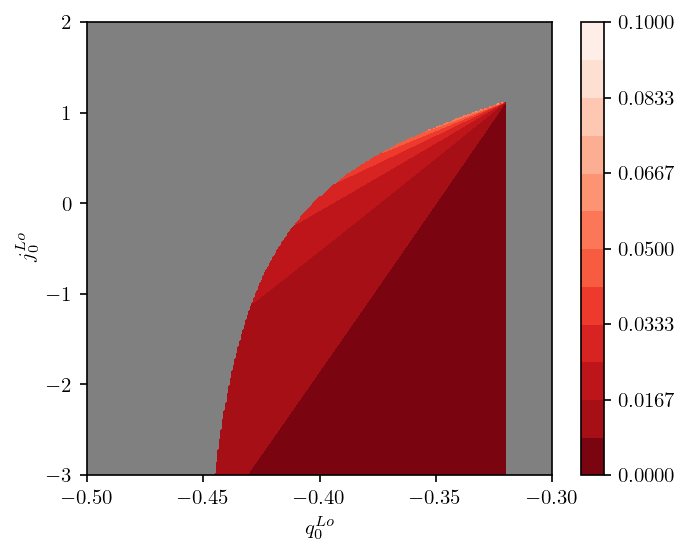

In [64]:
plt.figure(figsize=(5, 4))
plt.gcf().set_dpi(150)
plt.xlabel(r'$q_0^{Lo}$')
plt.ylabel(r'$j_0^{Lo}$')
plt.contourf(X, Y, Zf0Masked,40,cmap='Reds_r',levels=np.linspace(0,0.10,13))
plt.colorbar()

plt.savefig("constrained_Phi0.pdf")
plt.show()

plt.close()

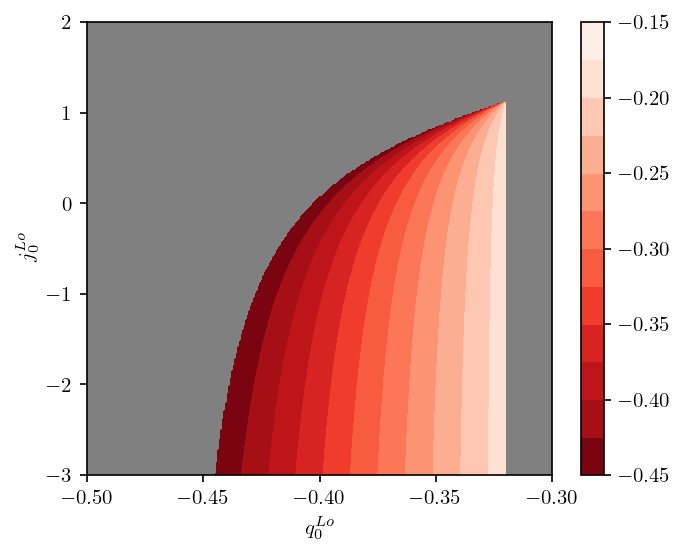

In [65]:
plt.figure(figsize=(5, 4))
plt.gcf().set_dpi(150)
plt.xlabel(r'$q_0^{Lo}$')
plt.ylabel(r'$j_0^{Lo}$')

plt.contourf(X, Y, ZOmegaMasked,cmap='Reds_r',levels=np.linspace(-0.45,-0.15,13))
plt.colorbar()

plt.savefig("constrained_Perturbed_Omega.pdf")
plt.show()

plt.close()

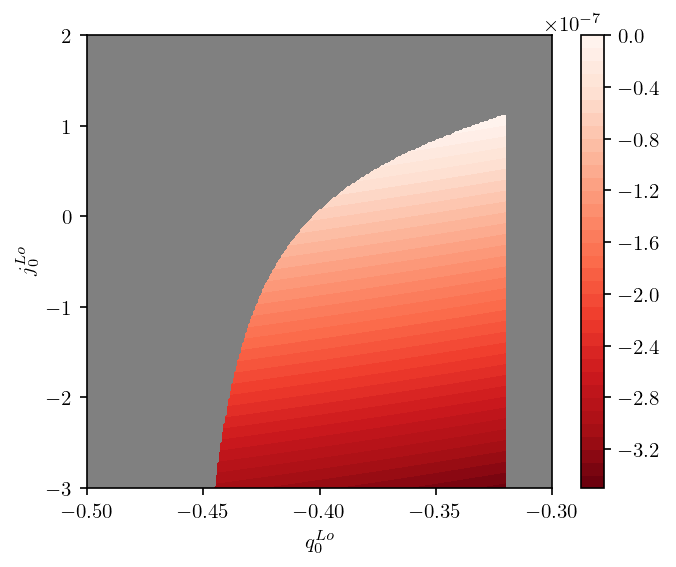

In [66]:
plt.figure(figsize=(5, 4))
plt.gcf().set_dpi(150)
plt.xlabel(r'$q_0^{Lo}$')
plt.ylabel(r'$j_0^{Lo}$')
plt.contourf(X, Y, Zg2Masked,40,cmap='Reds_r')
plt.colorbar()

plt.savefig("constrained_g2.pdf")
plt.show()

plt.close()